In [1]:
!pip install Fitter

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from fitter import Fitter, get_common_distributions, get_distributions

In [3]:
data = pd.read_csv('/content/Public-Dataset-Daily-Age-Group-Outcomes.csv')
data2=data[:560]
data2.head()


,DATE,AGE_GROUP,TOTAL_TESTS,TOTAL_CASES,TOTAL_HOSP,TOTAL_INACTIVE_RECOVERED,TOTAL_DEATHS
0,2/26/2022,0-10 years,1161182,181740,406,180318,NaN
1,2/26/2022,11-20 years,1589753,283545,668,282225,NaN
2,2/26/2022,21-30 years,2210672,352201,1666,350000,NaN
3,2/26/2022,31-40 years,1898498,318278,3057,315884,NaN
4,2/26/2022,41-50 years,1651440,285337,5152,282160,NaN


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE                      560 non-null    object 
 1   AGE_GROUP                 560 non-null    object 
 2   TOTAL_TESTS               560 non-null    int64  
 3   TOTAL_CASES               560 non-null    int64  
 4   TOTAL_HOSP                560 non-null    int64  
 5   TOTAL_INACTIVE_RECOVERED  560 non-null    int64  
 6   TOTAL_DEATHS              550 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 30.8+ KB


In [5]:
data1 = data2.groupby(['AGE_GROUP']).sum()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


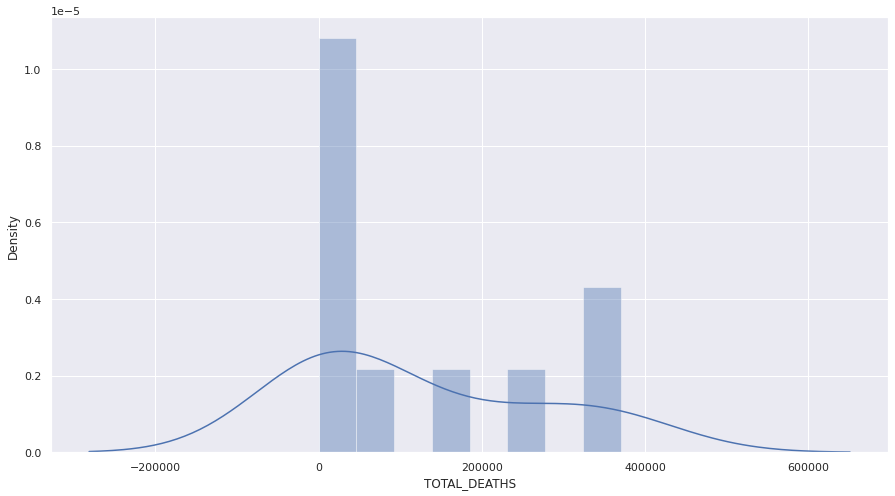

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(data1['TOTAL_DEATHS'],bins=8)

As in this Dist plot, the bar is high at 0-1000, which implies that the number of deaths occurring recently is less i.e. between 0 to 1000.

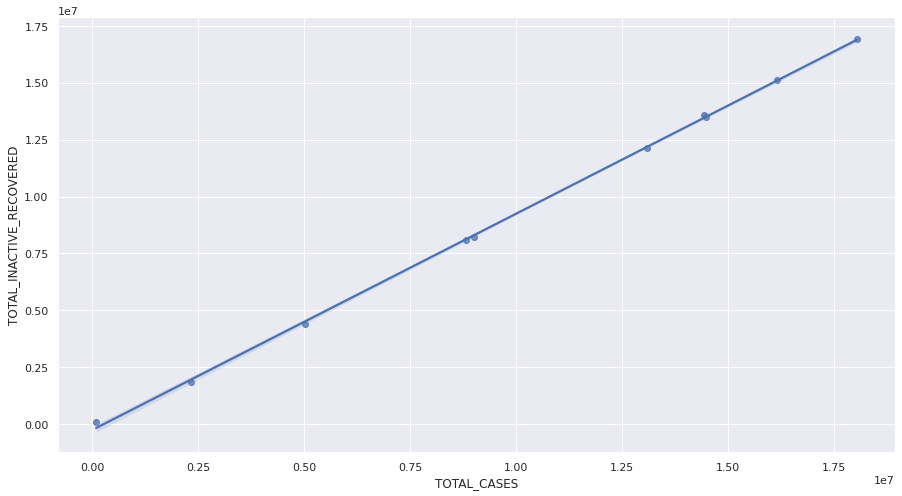

In [7]:
sns.regplot(x=data1['TOTAL_CASES'], y=data1['TOTAL_INACTIVE_RECOVERED'])

As in the Scatter plot, the total cases found and recovery rate is almost a straight line. So, we can say that the total cases found and recovery rate goes hand in hand. 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

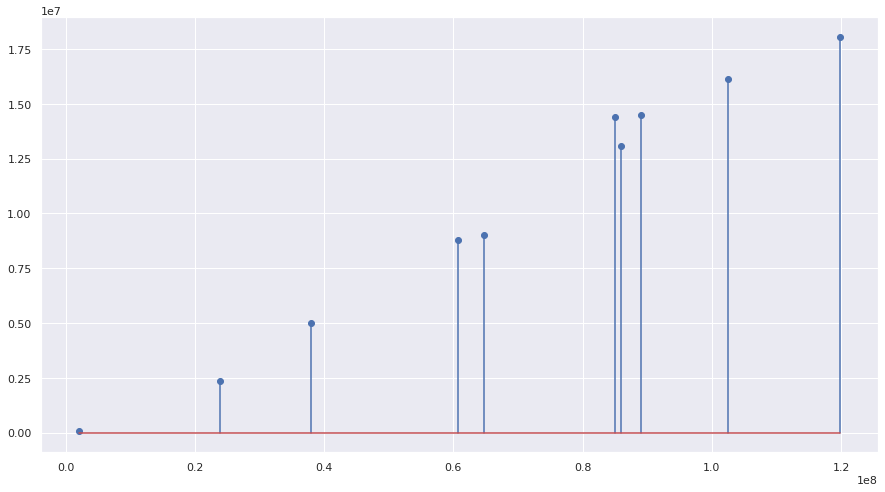

In [8]:
mp.stem(data1["TOTAL_TESTS"], data1["TOTAL_CASES"])   # required plot


In [9]:
data1.skew()

TOTAL_TESTS                -0.471865
TOTAL_CASES                -0.448428
TOTAL_HOSP                  0.267090
TOTAL_INACTIVE_RECOVERED   -0.416112
TOTAL_DEATHS                0.833774
dtype: float64


*   The variables with skewness > 1 are highly positively skewed.
*   The variables with skewness < -1 such as TOTAL_TESTS, TOTAL_CASES, and TOTAL_INACTIVE_RECOVERED are highly negatively skewed.
*   The variables with 0.5 < skewness < 1 such as TOTAL_DEATHS are moderately positively skewed.
*   The variables with -0.5 < skewness < -1 are moderately negatively skewed.
*   And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as TOTAL_HOSP.

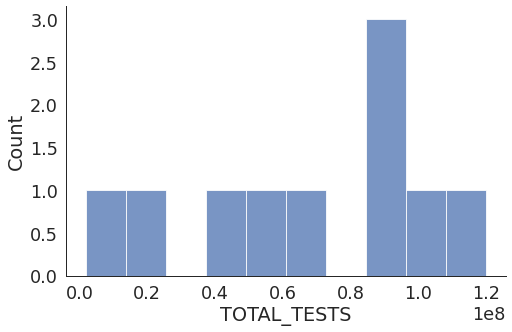

In [10]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data1, x="TOTAL_TESTS", kind="hist", bins = 10, aspect = 1.5)

In [11]:
tt = data1["TOTAL_TESTS"].values


,sumsquare_error,aic,bic,kl_div
uniform,6.489955e-14,3720.833047,-322.080038,inf
norm,6.559796e-14,3759.431402,-321.972999,inf
gamma,6.568731e-14,3761.419493,-319.656803,inf
cauchy,6.571133e-14,3829.849187,-321.955731,inf
rayleigh,6.609004e-14,3754.311313,-321.898265,inf


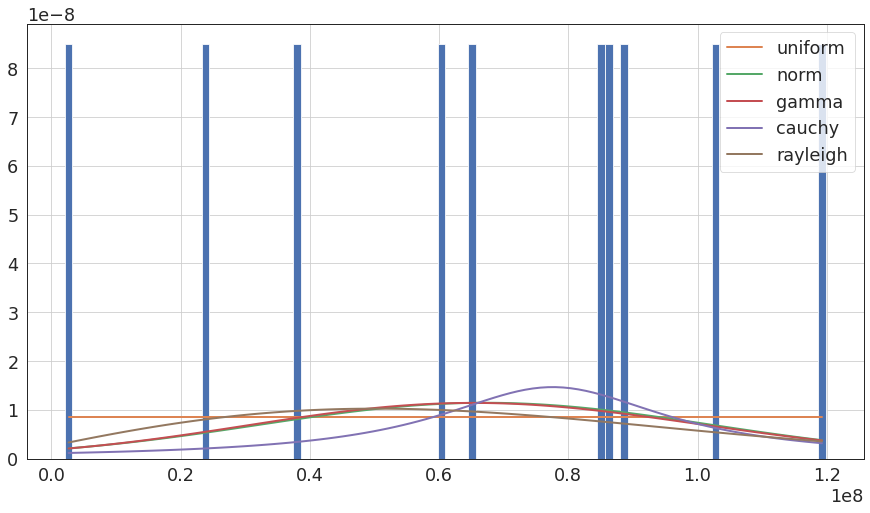

In [12]:
f = Fitter(tt,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [13]:
f.get_best(method = 'sumsquare_error')


{'uniform': {'loc': 2072268.0, 'scale': 117760709.0}}

In [14]:
f.fitted_param["uniform"]


(2072268.0, 117760709.0)

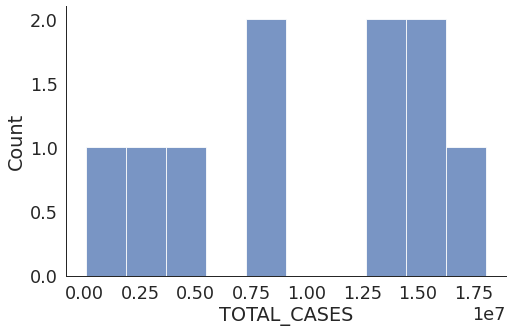

In [15]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data1, x="TOTAL_CASES", kind="hist", bins = 10, aspect = 1.5)


,sumsquare_error,aic,bic,kl_div
powerlaw,2.758120e-12,3365.262145,-282.282813,inf
uniform,2.791846e-12,3344.671281,-284.463861,inf
norm,2.854593e-12,3385.723944,-284.241599,inf
gamma,2.857137e-12,3387.667386,-281.930106,inf
rayleigh,2.865745e-12,3380.777121,-284.202608,inf


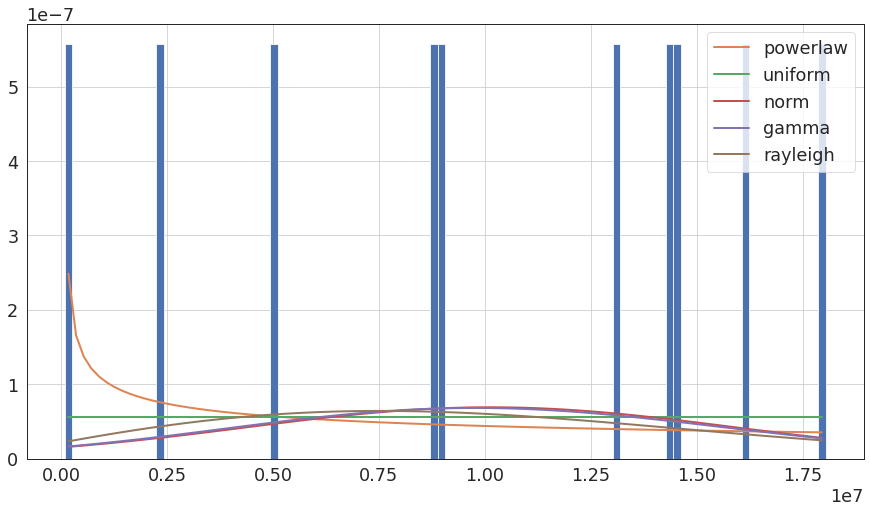

In [16]:
tt = data1["TOTAL_CASES"].values
f = Fitter(tt,
           distributions= get_common_distributions())
f.fit()
f.summary()


In [17]:
f.fitted_param["powerlaw"]


(0.6308066474128111, 86423.99999999999, 17957830.34926485)

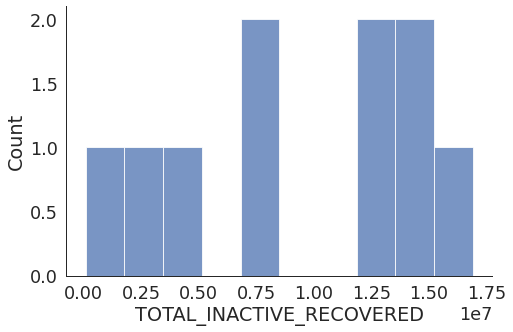

In [18]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data1, x="TOTAL_INACTIVE_RECOVERED", kind="hist", bins = 10, aspect = 1.5)


{'powerlaw': {'a': 0.7399309091321055,
  'loc': 84484.99999998051,
  'scale': 16826301.467173956}}

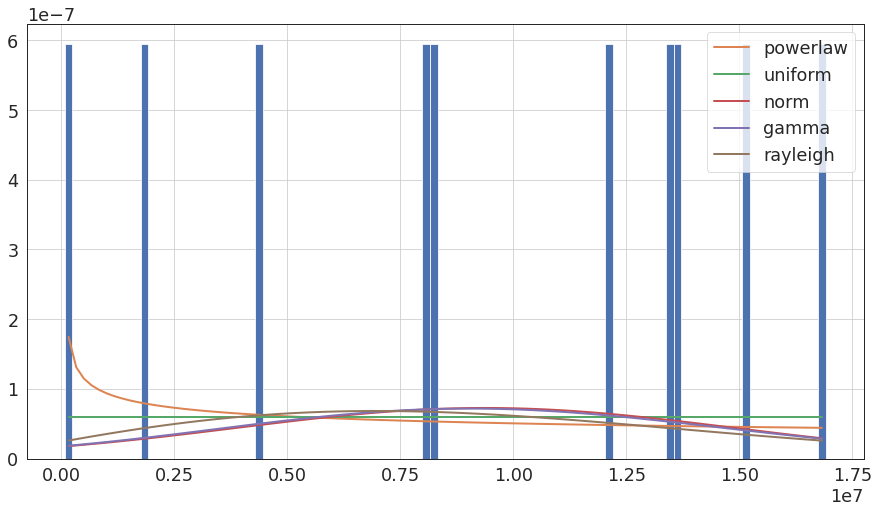

In [19]:
tt = data1["TOTAL_INACTIVE_RECOVERED"].values
f = Fitter(tt,
           distributions= get_common_distributions())
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [20]:
f.fitted_param["powerlaw"]


(0.7399309091321055, 84484.99999998051, 16826301.467173956)

In [21]:
myfield1 = data["TOTAL_CASES"]
myfield2 = data["AGE_GROUP"]

crosstable = pd.crosstab(myfield1,myfield2)
crosstable

AGE_GROUP,0-10 years,11-20 years,21-30 years,31-40 years,41-50 years,51-60 years,61-70 years,71-80 years,81+ years,Pending
TOTAL_CASES,,,,,,,,,,
0,8,5,7,5,3,5,1,3,5,5
1,1,4,0,1,0,1,2,1,4,0
2,0,0,0,2,0,1,4,3,1,7
3,0,0,1,0,1,0,1,1,0,12
4,2,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...
351218,0,0,1,0,0,0,0,0,0,0
351540,0,0,1,0,0,0,0,0,0,0
351856,0,0,1,0,0,0,0,0,0,0


In [22]:
obs=crosstable.values

In [23]:
from scipy.stats import chi2_contingency


In [24]:
val= chi2_contingency(crosstable)
val

(60727.859046183774,
 4.3836743422550693e-17,
 57852,
 array([[4.70458664, 4.70458664, 4.70458664, ..., 4.70458664, 4.70458664,
         4.6587202 ],
        [1.40136623, 1.40136623, 1.40136623, ..., 1.40136623, 1.40136623,
         1.38770389],
        [1.80175659, 1.80175659, 1.80175659, ..., 1.80175659, 1.80175659,
         1.78419072],
        ...,
        [0.10009759, 0.10009759, 0.10009759, ..., 0.10009759, 0.10009759,
         0.09912171],
        [0.10009759, 0.10009759, 0.10009759, ..., 0.10009759, 0.10009759,
         0.09912171],
        [0.10009759, 0.10009759, 0.10009759, ..., 0.10009759, 0.10009759,
         0.09912171]]))

In [25]:
exp=val[3]

In [26]:
n_r =len(crosstable.iloc[0:2,0])
n_c =len(crosstable.iloc[0,0:2])
ddof=(n_r -1)*(n_c -1)

alpha=0.05
ddof

1

In [27]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(obs,exp)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [28]:
print("chi-square statistic:-",chi_square_statistic)


chi-square statistic:- 12119.286546830885


In [29]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [30]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)


p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1


In [31]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


DATA SET CREATION

In [32]:
from sklearn.datasets import make_classification
import pandas as pd

In [33]:
features, output = make_classification(n_samples = 500,
                                       n_features = 5,
                                       n_informative = 5,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       weights = [.2, .3, .8])

In [34]:
print("Feature Matrix: ");
print(pd.DataFrame(features, columns=["Feature 1","Feature 2","Feature 3","Feature 4","Feature 5"]).head())

Feature Matrix: 
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
0  -0.669069   0.694067   0.025230  -0.339302  -3.634428
1   1.655077   0.735777   4.320145   1.846124  -1.540553
2  -0.790247  -1.088242   0.894762   2.445375  -0.219703
3   1.720555   1.166328   1.484375  -1.790400  -2.063181
4   1.268675  -3.024064   0.496525  -2.022449  -1.259894


In [35]:
features

array([[-0.66906873,  0.69406746,  0.02523008, -0.339302  , -3.63442819],
       [ 1.65507661,  0.73577685,  4.32014484,  1.84612362, -1.54055271],
       [-0.79024676, -1.08824241,  0.89476206,  2.44537514, -0.2197028 ],
       ...,
       [ 2.29638108, -2.01509658,  1.08375884, -2.01686701, -0.1696019 ],
       [ 1.09124309, -4.49515749, -3.49388053,  4.29353841, -4.20399284],
       [ 2.22078628, -2.23875381,  2.64586602, -1.5853859 , -0.21920871]])

In [36]:
print()
print("Target Class: ");
print(pd.DataFrame(output, columns=["TargetClass"]).head())


Target Class: 
   TargetClass
0            2
1            1
2            0
3            2
4            2


Text(0, 0.5, 'Counts')

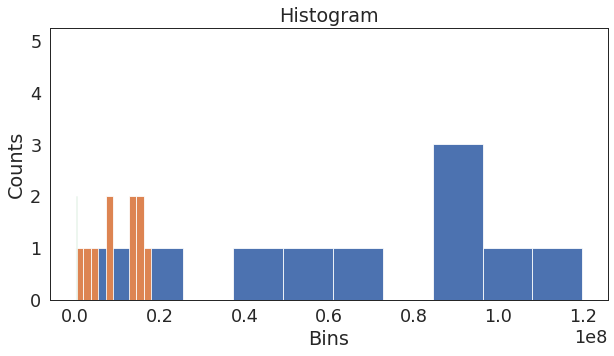

In [38]:
fig, axs = mp.subplots(figsize = (10,5))
axs.hist(data1["TOTAL_TESTS"], bins=10)
axs.hist(data1["TOTAL_CASES"], bins=10)
axs.hist(data1["TOTAL_DEATHS"], bins=10)

axs.set_title("Histogram")
axs.set_xlabel("Bins")
axs.set_ylabel("Counts")

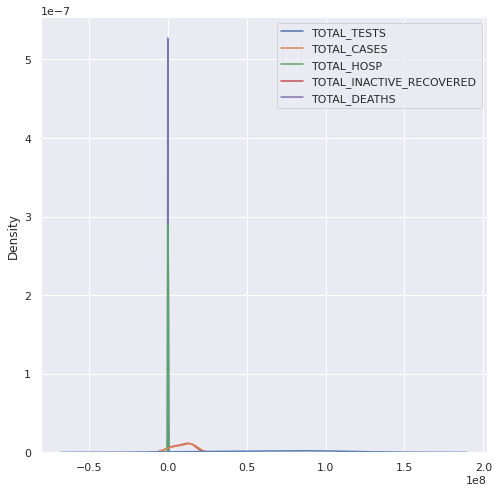

In [39]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.kdeplot(data=data1);

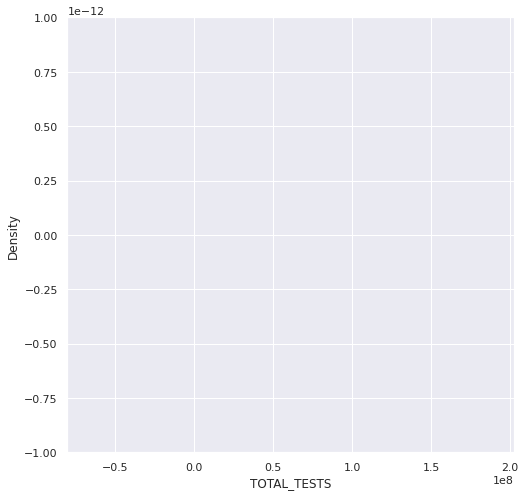

In [40]:
sns.kdeplot(data1.TOTAL_TESTS)

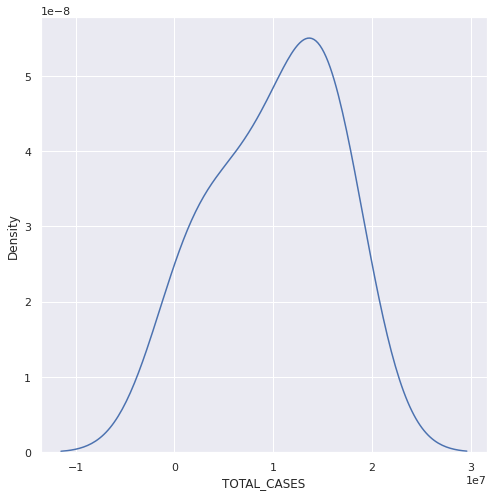

In [41]:
sns.kdeplot(data1.TOTAL_CASES);

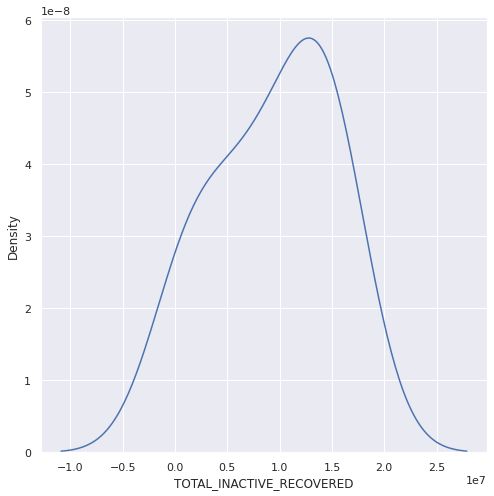

In [42]:
sns.kdeplot(data1.TOTAL_INACTIVE_RECOVERED)

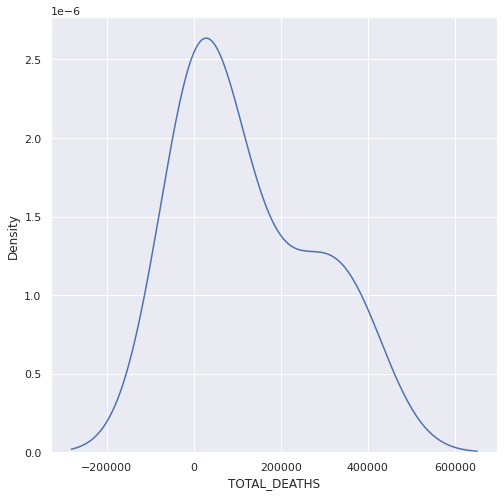

In [43]:
sns.kdeplot(data1.TOTAL_DEATHS)

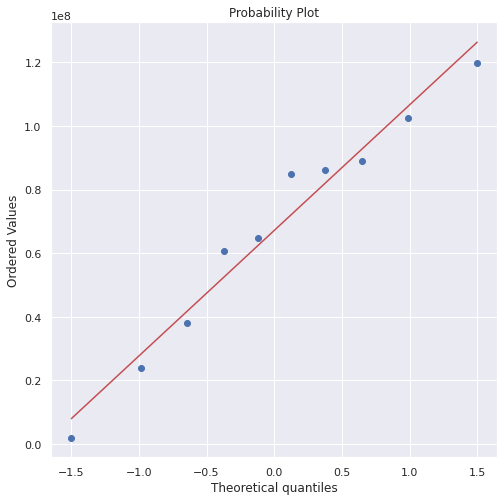

In [44]:
stats.probplot(data1.TOTAL_TESTS,plot=pylab);

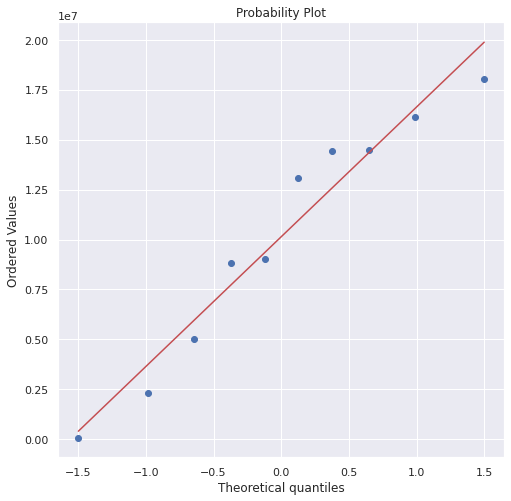

In [45]:
stats.probplot(data1.TOTAL_CASES,plot=pylab);

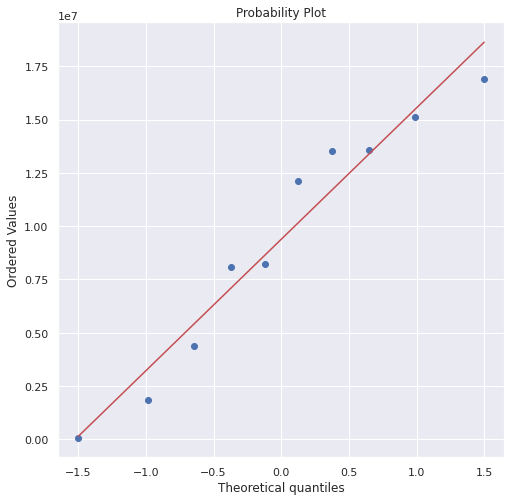

In [46]:
stats.probplot(data1.TOTAL_INACTIVE_RECOVERED,plot=pylab);

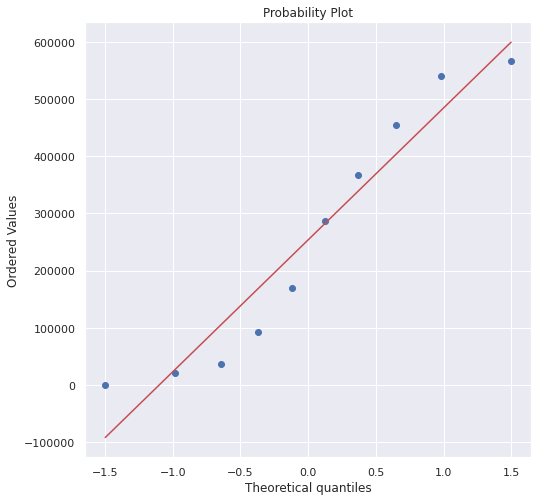

In [47]:
stats.probplot(data1.TOTAL_HOSP,plot=pylab);

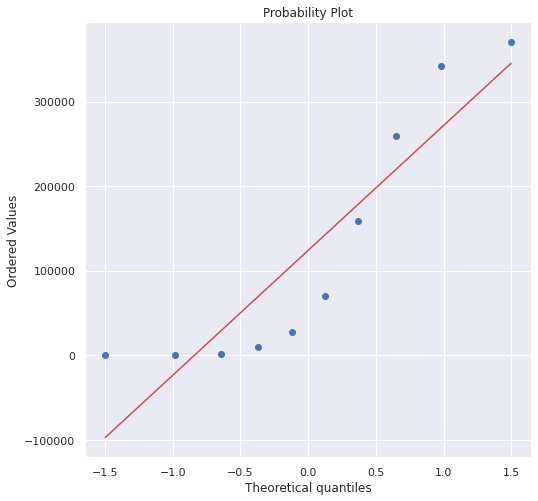

In [48]:
stats.probplot(data1.TOTAL_DEATHS,plot=pylab);

In [49]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

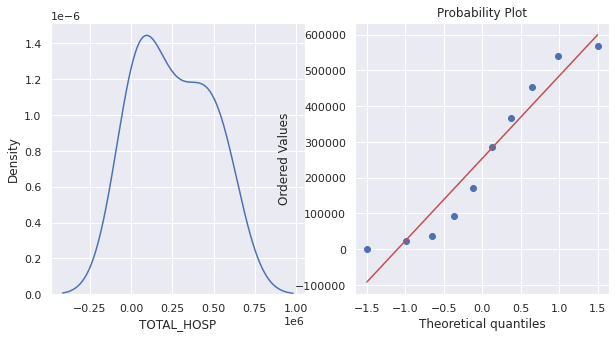

In [50]:
normality(data1,"TOTAL_HOSP")

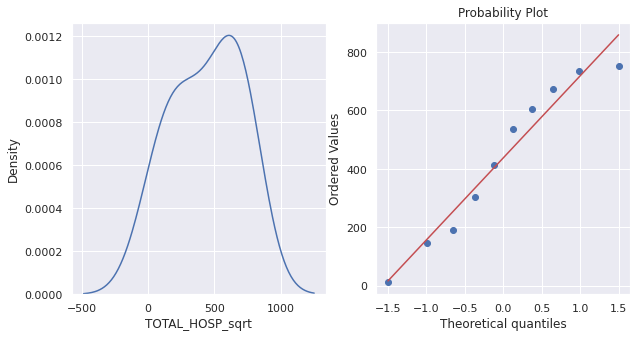

In [51]:
data1['TOTAL_HOSP_sqrt']=np.sqrt(data1['TOTAL_HOSP'])
normality(data1,"TOTAL_HOSP_sqrt")

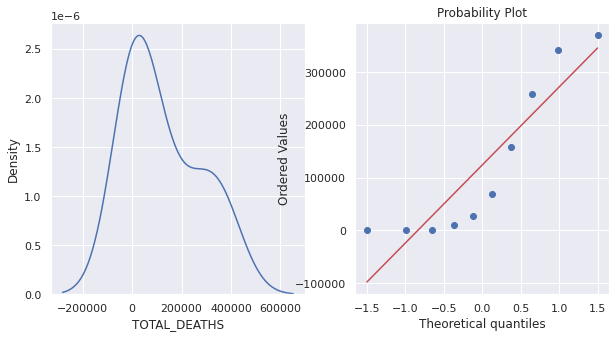

In [52]:
normality(data1,"TOTAL_DEATHS")

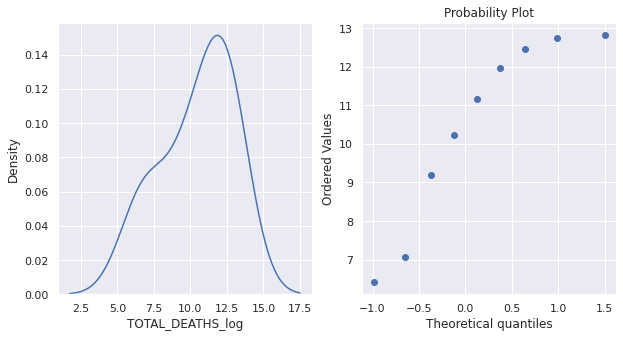

In [53]:
data1['TOTAL_DEATHS_log']=np.log(data1['TOTAL_DEATHS'])
normality(data1,"TOTAL_DEATHS_log")

In [54]:
data1.skew()

TOTAL_TESTS                -0.471865
TOTAL_CASES                -0.448428
TOTAL_HOSP                  0.267090
TOTAL_INACTIVE_RECOVERED   -0.416112
TOTAL_DEATHS                0.833774
TOTAL_HOSP_sqrt            -0.309565
TOTAL_DEATHS_log                 NaN
dtype: float64

In [55]:
data1.drop(['TOTAL_DEATHS','TOTAL_HOSP'], axis = 1,inplace= True)


In [56]:
mean = data1["TOTAL_TESTS"].mean()
mean1 = data1["TOTAL_CASES"].mean()
mean,mean1

(67168895.1, 10141365.7)

In [57]:
tset, pval = ttest_1samp(data1['TOTAL_TESTS'], 8895)
print("p-values",pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")


p-values 0.0002695786547276893
 we are rejecting null hypothesis


In [58]:
tset, pval = ttest_1samp(data1['TOTAL_CASES'], 10141306)
print("p-values",pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 0.9999760074604123
we are accepting null hypothesis


In [59]:
iteration_val=len(data1.columns)-1
selecte_feature_index=[]

In [60]:
data1[data1 < 0] = 0
# print("New Array :")
# data1

In [61]:
for i in range(0,iteration_val,1):
    print('Feature Name : {0}'.format(data1.columns[i]))
    table= data1[data1.iloc[:,[i,iteration_val]].columns].values
    chi_squared_stat, p_value, dof, expected=chi2_contingency(table)
    print("chi_squared_stat: ",chi_squared_stat)
    probability=0.95
    critical=chi2.ppf(probability, dof)
    if abs(chi_squared_stat)>=critical:
        print('\t Reject Hypothesis 0 (null Hypothesis)')
    elif abs(chi_squared_stat)<critical:
        print('\t Fail to Reject Hypothesis 0 (null Hypothesis)')
        selecte_feature_index.append(i)
    
    alpha = 0.05
    print('Significance {0}, {1}'.format(alpha, p_value))
    if p_value<=alpha:
        print("\t Reject Hypothesis 0 (null Hypothesis)")
    else:
        print('\t Fail to Reject Hypothesis 0 (null Hypothesis)')
        selecte_feature_index.append(i)
    print('================================================================')

Feature Name : TOTAL_TESTS
chi_squared_stat:  46.179802602055005
	 Reject Hypothesis 0 (null Hypothesis)
Significance 0.05, 5.576495836655756e-07
	 Reject Hypothesis 0 (null Hypothesis)
Feature Name : TOTAL_CASES
chi_squared_stat:  77.21893404040038
	 Reject Hypothesis 0 (null Hypothesis)
Significance 0.05, 5.754585591598041e-13
	 Reject Hypothesis 0 (null Hypothesis)
Feature Name : TOTAL_INACTIVE_RECOVERED
chi_squared_stat:  92.41296699514167
	 Reject Hypothesis 0 (null Hypothesis)
Significance 0.05, 5.333480866301491e-16
	 Reject Hypothesis 0 (null Hypothesis)
Feature Name : TOTAL_HOSP_sqrt
chi_squared_stat:  8.60317621165327
	 Fail to Reject Hypothesis 0 (null Hypothesis)
Significance 0.05, 0.4746803040277736
	 Fail to Reject Hypothesis 0 (null Hypothesis)


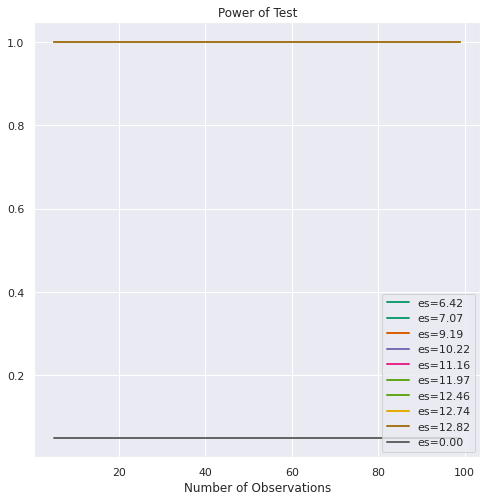

In [62]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
  
  
# power analysis varying parameters
effect_sizes = data1["TOTAL_DEATHS_log"]
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()